In [1]:
import wandb
import pandas as pd

In [7]:
run = wandb.init(project="exercise_4", job_type="use_file", save_code=True)
artifact = run.use_artifact("amaru-utec/exercise_4/genres_mod.parquet:latest")
df = pd.read_parquet(artifact.file())
df.head()

wandb: wandb version 0.12.20 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,genre,song_name,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,audio_features,124539,4,Dark Trap,Mercury: Retrograde,None
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,audio_features,224427,4,Dark Trap,Pathology,None
2,0.850,0.893,5,NaN,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,audio_features,98821,4,Dark Trap,Symbiote,None
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,audio_features,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),None
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,audio_features,123298,4,Dark Trap,Venom,None


In [9]:
from pandas_profiling import ProfileReport

In [10]:
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True) 
profile.to_widgets()

Summarize dataset:   0%|          | 0/30 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

wandb: Network error (ConnectionError), entering retry loop. See wandb/debug-internal.log for full traceback.
wandb: Network error resolved after 0:00:18.387973, resuming normal operation.


In [11]:
df = df.drop_duplicates().reset_index(drop=True)

In [20]:
df['title'].fillna(value='', inplace=True)
df['song_name'].fillna(value='', inplace=True)
df['text_feature'] = df['title'] + ' ' + df['song_name']

In [13]:
import seaborn as sns
sns.set()

/home/amaru/anaconda3/envs/mlflow-51a201f2a8eac0601d78afdf58767b0a4aa0f41a/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='loudness', ylabel='Density'>

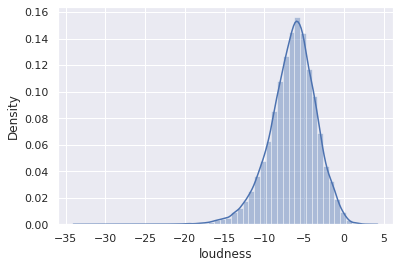

In [19]:
sns.distplot(df['loudness'])

In [29]:
run.finish()